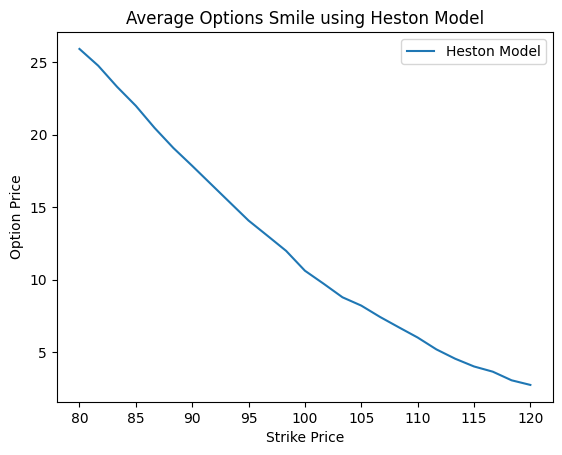

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Définition des paramètres du modèle de Heston
S0 = 100  # Prix initial de l'actif sous-jacent
V0 = 0.04  # Volatilité initiale
r = 0.05  # Taux d'intérêt sans risque
kappa = 2  # Vitesse de réversion
theta = 0.04  # Niveau long terme de la volatilité
sigma = 0.3  # Volatilité de la volatilité
rho = -0.5  # Corrélation entre les mouvements browniens de l'actif et de la volatilité
T = 1  # Maturité des options
K = np.linspace(80, 120, 25)  # Différents prix d'exercice
N = 10000  # Nombre de simulations Monte Carlo

# Simulation des trajectoires de prix et de volatilité
dt = 1 / 252  # Pas de temps
M = 252  # Nombre de pas de temps dans une année
n_simulations = 100  # Nombre de simulations
np.random.seed(42)

# Calcul des prix des options pour chaque prix d'exercice
option_prices = np.zeros_like(K)
for i, strike in enumerate(K):
    payoff_sum = 0
    for _ in range(N):
        # Simulation de la trajectoire du prix de l'actif sous-jacent et de la volatilité
        St = [S0]
        Vt = [V0]
        for t in range(1, M + 1):
            Z1 = np.random.normal(0, 1)
            Z2 = rho * Z1 + np.sqrt(1 - rho ** 2) * np.random.normal(0, 1)
            St.append(
                St[-1]
                * np.exp(
                    (r - 0.5 * Vt[-1]) * dt
                    + np.sqrt(Vt[-1] * dt) * Z1
                )
            )
            Vt.append(
                np.maximum(0, Vt[-1] + kappa * (theta - Vt[-1]) * dt + sigma * np.sqrt(Vt[-1] * dt) * Z2)
            )
        payoff_sum += np.maximum(St[-1] - strike, 0)
    option_prices[i] = payoff_sum / N

# Affichage du smile des options call
plt.plot(K, option_prices, label="Heston Model")
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title("Average Options Smile using Heston Model")
plt.legend()
plt.show()
